# Analysis of UQ runs
These notebooks will be used to plot data and data analysis for UQ runs for SOFE 2023.

I have optimised more things in this second set of runs. Optimised run just optimises the two biggest factors, aspect and tbrnmn.

In optimised run 2I have also optimised etath and ralpne.

## Import the Uncertainty Data and create object

## Calculate Sensitivity Indices and Reliability

In [20]:
%load_ext autoreload
%autoreload 1
from pathlib import Path
from bokeh.plotting import figure, show
import sys
sys.path.append('/home/graeme/process_uq/')
sys.path.append('/home/graeme/PROCESS_SALib/')
from uq_analysis import UncertaintyData, Copula, CopulaAnalysis
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()

proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/data/uq_run_data/paper_runs/demo_opt10_analysis/output"
figure_of_merit = "rmajor"
uq_data = UncertaintyData(proj_dir, figure_of_merit,use_scoping_data=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [21]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_failure_probability()
print("Number of samples: ", len(uq_data.uncertainties_df))
print("Number of converged runs: ",uq_data.number_of_converged_runs,)
print("Failure Rate: ", uq_data.failure_probability,"+/-", uq_data.failure_cov)


Number of samples:  207
Number of converged runs:  100
Failure Rate:  0.52 +/- 0.07


## Regional Sensitivity - what causes PROCESS to converge?

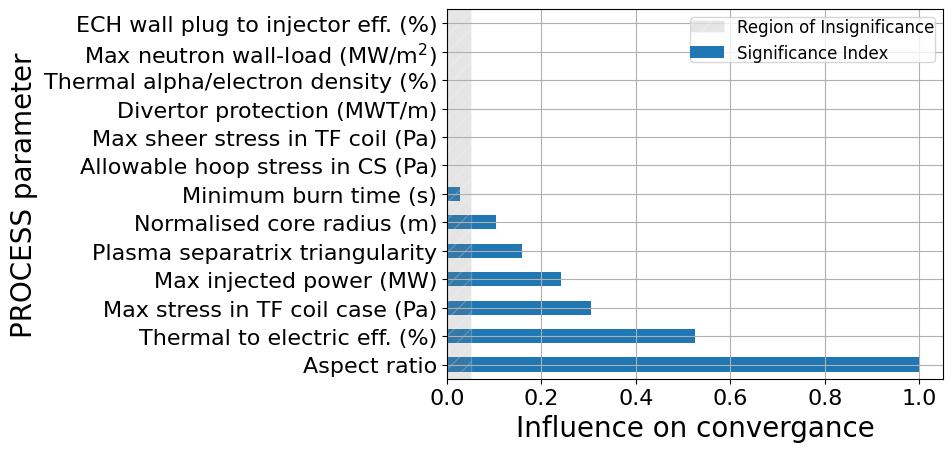

['aspect', 'etath', 'sig_tf_case_max', 'pinjalw', 'triang', 'coreradius']


In [22]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.05).tolist()
significant_conv_vars=significant_conv_vars
print(significant_conv_vars)


## Find the iteration variables which are influential for the significant convergence variables

In [23]:
copula = Copula(uq_data.converged_df,significant_conv_vars,copula_type="unbounded")
copula.calculate_copula(synthetic_sample_size=3000)
print(copula.synthetic_data.mean())
# copula.calculate_pdf()
copula.copula_data_dict()
print(copula.copula.ppfs)
# pdf_df=copula.create_pdf_df()
# copula.find_max_pdf(print_data=False)
# copula_correlation_matrix = copula.correlation_matrix()

/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/multivariate/vine.py:73: UserWarning: Vines have not been fully tested on Python >= 3.8 and might produce wrong results.
  warnings.warn(


aspect             2.810953e+00
etath              3.939386e-01
sig_tf_case_max    5.915545e+08
pinjalw            4.975220e+01
triang             4.937798e-01
coreradius         7.319524e-01
dtype: float64
[<bound method GaussianKDE.percent_point of GaussianKDE>, <bound method GaussianKDE.percent_point of GaussianKDE>, <bound method GaussianKDE.percent_point of GaussianKDE>, <bound method GaussianKDE.percent_point of GaussianKDE>, <bound method GaussianKDE.percent_point of GaussianKDE>, <bound method GaussianKDE.percent_point of GaussianKDE>]


In [24]:
# copula.plot_correlation_matrix(copula_correlation_matrix)

NameError: name 'copula_correlation_matrix' is not defined

In [25]:
# custom_data = {"aspect":3.0,"etath":0.375}
# conv_copula_analysis=CopulaAnalysis(uq_data,copula,num_intervals=6)#,custom_data_point=custom_data)
# conv_network= conv_copula_analysis.correlation_network(copula.correlation_matrix(),threshold=0.003,variables=significant_conv_vars)
# conv_copula_analysis.plot_network(conv_network,fig_height=500,fig_width=500)
# show(conv_copula_analysis.create_graph_grid(significant_conv_vars))
# show(conv_copula_analysis.create_datatable(significant_conv_vars))


AttributeError: 'Copula' object has no attribute 'pdf'

## Create a copula based on the important variables for convergence and iteration variables

In [27]:
all_variables = significant_conv_vars + ["sig_tf_case_max","sig_tf_wp_max","alstroh","rmajor",'bt', 'beta', 'jwptf', 'fcutfsu', 'plhthresh', 'wallmw', 'dene', 'ohcth', 'bore', 'coheof', 'powfmw', 'cohbop', 'te', 'bigq', 'tfcth', 'tdmptf', 'vtfskv']
vars_to_model = []
for item in all_variables:
    if item not in vars_to_model:
        vars_to_model.append(item)
print(vars_to_model)
itv_conv_copula = Copula(uq_data.converged_df,vars_to_model, copula_type="unbounded")
itv_conv_copula.calculate_copula(synthetic_sample_size=3000)
print(copula.synthetic_data.mean())

# itv_conv_copula.calculate_pdf()
# itv_pdf_df=itv_conv_copula.create_pdf_df()
# itv_conv_copula.copula_data_dict()


['aspect', 'etath', 'sig_tf_case_max', 'pinjalw', 'triang', 'coreradius', 'sig_tf_wp_max', 'alstroh', 'rmajor', 'bt', 'beta', 'jwptf', 'fcutfsu', 'plhthresh', 'wallmw', 'dene', 'ohcth', 'bore', 'coheof', 'powfmw', 'cohbop', 'te', 'bigq', 'tfcth', 'tdmptf', 'vtfskv']


/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/multivariate/vine.py:73: UserWarning: Vines have not been fully tested on Python >= 3.8 and might produce wrong results.
  warnings.warn(
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/bivariate/base.py:162: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


aspect             2.810953e+00
etath              3.939386e-01
sig_tf_case_max    5.915545e+08
pinjalw            4.975220e+01
triang             4.937798e-01
coreradius         7.319524e-01
dtype: float64


In [ ]:
itv_correlation_matrix = itv_conv_copula.correlation_matrix()
custom_data = {"etath":0.370,"ralpne":0.07}
itv_conv_copula_analysis=CopulaAnalysis(uq_data,itv_conv_copula,num_intervals=20)#,custom_data_point=custom_data)
itv_correlation_matrix = itv_conv_copula.correlation_matrix()
itv_network = itv_conv_copula_analysis.correlation_network(itv_conv_copula.correlation_matrix(),threshold=0.5,variables=significant_conv_vars)
itv_conv_copula_analysis.plot_network(itv_network)
show(itv_conv_copula_analysis.create_datatable(vars_to_model))